<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html

def selection_sort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionOfMax=0 
        for location in range(1,fillslot+1):
            if alist[location]>alist[positionOfMax]:
                positionOfMax = location

        alist[fillslot], alist[positionOfMax] = alist[positionOfMax], alist[fillslot]

In [3]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        
        currentvalue = alist[index]
        position = index

        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1

        alist[position]=currentvalue

In [4]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort
# and https://www.geeksforgeeks.org/merge-sort/

def merge_sort(alist):
    # Base case - if list is 1 or less, it is sorted by default
    if len(alist) > 1:

        # Get midpoint of the list with integer division
        midpoint = len(alist) // 2
    
        # Splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # Recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus be sorted.

        # Code below merges the smaller sorted lists into larger sorted lists
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        """Compare left and right lists, merging smaller sorted lists to become larger sorted lists, 
           eventually placing the sorted elements back into alist"""
        while l < len(left_list) and r < len(right_list):
            if left_list[l] <= right_list[r]: # keeps algorithm stable, maintaining order of alist 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            a += 1

        # Some lists will not have a left/right counterpart and so will be dealt with below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1
        # The original list has now been sorted

In [5]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheQuickSort.html?highlight=quicksort

def quick_sort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


In [6]:
# https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def counting_sort(alist, max_val=100):
    m = max_val + 1
    count = [0] * m                
    
    for a in alist:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            alist[i] = a
            i += 1
    return alist

In [7]:
# Create an array of size n consisting of random integers between the values 0-99  
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000,s 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
def benchmarking(sorting_func):
    
    # List to contain the running times for each algorithm
    sort_times = []

    # Time test for each sorting algorithm
    for n in n_size:
        start_time = time.time()
        sorting_func(random_array(n))
        end_time = time.time()
        time_elapsed = round((end_time - start_time), 3)
        sort_times.append(time_elapsed)
    
    return sort_times

In [10]:
def average_time(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    
    arr_times = np.array(times)
    
    average = np.mean(arr_times, axis=0)
    
    return average

In [11]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)
    
print(all_averages)

[array([0.0021, 0.0101, 0.0396, 0.094 , 0.172 ]), array([0.0014, 0.0051, 0.0224, 0.0566, 0.1064]), array([0.002 , 0.005 , 0.01  , 0.0157, 0.0226]), array([0.0005, 0.0017, 0.0036, 0.0069, 0.0089]), array([0.    , 0.0009, 0.0019, 0.0022, 0.0031])]


In [12]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

In [13]:
df.round(3)

,100,250,500,750,1000
Insertion Sort,0.002,0.010,0.040,0.094,0.172
Selection Sort,0.001,0.005,0.022,0.057,0.106
Merge Sort,0.002,0.005,0.010,0.016,0.023
Quick Sort,0.000,0.002,0.004,0.007,0.009
Counting Sort,0.000,0.001,0.002,0.002,0.003


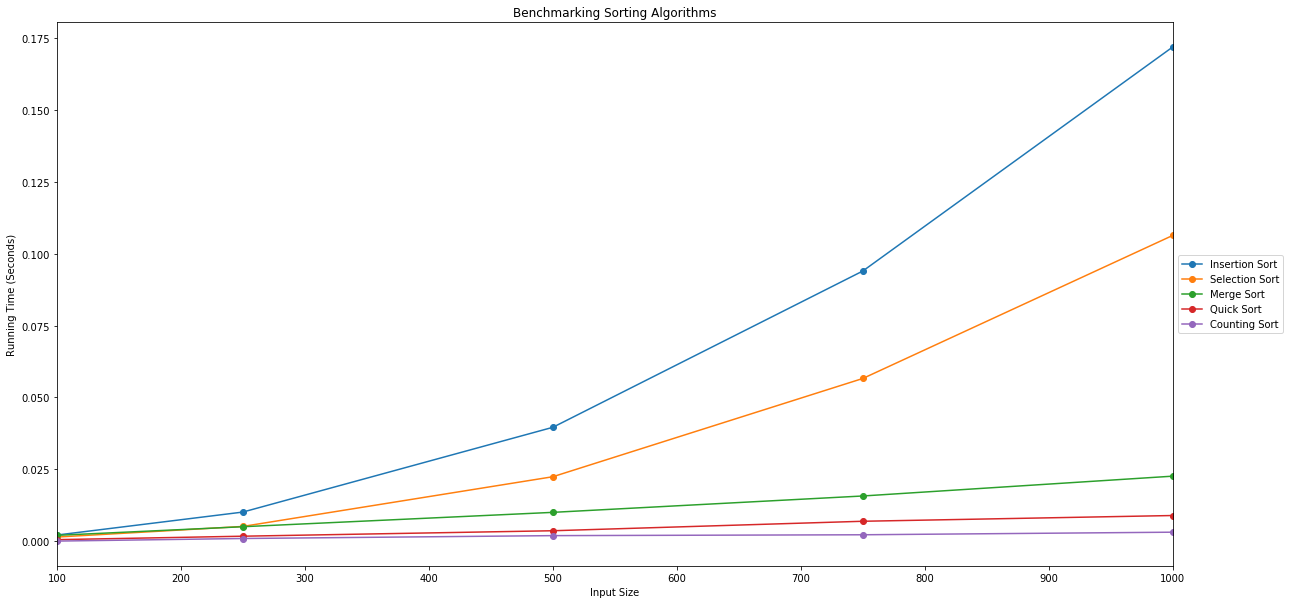

In [14]:
# https://stackoverflow.com/a/31734795
# https://stackoverflow.com/a/43610256
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()